<a href="https://colab.research.google.com/github/sarathsajan/dream11-predictor/blob/main/Dream11_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dream11 Fantasy Team Analysis And Prediction**

This is a newbie's first step into data analysis, so bear with me if I do steps which are completely absurd and outright wrong. Also i dont have thousands of datapoints, each data point had to be manually filled from the dream11 app after each game. So if someone has any better ideas to get the data, please shoot I am all ears.

That said, IPL is back and I recently started playing Dream11 as I had nothing else to do. There were so many low-cost paid matches, which had some pretty big prize money but unfortunately the bigger the amount is so is the participation. I knew I would struggle if I outright played with cash, so as a start I did what all great pro players do. I decided to go for the practice matches.

And so I went for the 10000 slot competetion. The first team I created was a completely random team with which I got 8000ish rank out of 10000. Even though it was completely random I started getting the feel of it and the next team made it to sub-6000 rank. By the third match I was getting in the grove of making teams which could easily break the sub-5000 rank and rarely going above 5000.

TODO : fill in the intro story here

## Libraries used

In this project we will use the following libraries
* numpy: for fast manipulation & calculation of large, multi-dimensional arrays and matrices
* pandas: for data manipulation and analysis
* seaborn: for plotting and visualising data
* matplotlib: plotting and visualising data
* scikit-learn: for data preprocessing and training ML models

In [1]:
#from google.colab import files
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model, tree, ensemble
from sklearn import model_selection, metrics
from operator import itemgetter

## Data
So here's the csv file I created over time as the tournament progressed. It contains the details of only those matches that I competed in, as Dream11 wouldn't allow to see the player points of past matches which I haven't competed in.

In [2]:
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['d11_dataset.csv']))
df = pd.read_csv('https://raw.githubusercontent.com/sarathsajan/dream11-predictor/main/d11-dataset.csv')

## Exploring the data
Lets do some data exploration before starting with the analysis

In [3]:
print (df.head())
print (df.info())
print (df.describe())

   selection_percent  type team  points
0              47.67  bowl   rr      97
1               9.74  bowl  kkr      79
2              79.17  bowl   rr      74
3              94.60   bat  kkr      66
4              52.30  bowl  kkr      64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selection_percent  462 non-null    float64
 1   type               462 non-null    object 
 2   team               462 non-null    object 
 3   points             462 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 14.6+ KB
None
       selection_percent      points
count         462.000000  462.000000
mean           48.698009   36.025974
std            25.499427   29.815910
min             0.440000   -2.000000
25%            26.067500   12.000000
50%            48.945000   29.000000
75%            72.237500   54.000000
max 

Now we know that the dataframe contains selection_percent, type, team and points as the columns.
* selection_percent: the percentage of participants who selected that player
* type: the role of player which includes
  * batsman
  * bowler
  * all-rounder
  * wicket-keeper
* team: the team that player represents. The teams in IPL 2020 season are
  * Chennai Super Kings *CSK*
  * Kings XI Punjab *KXIP*
  * Mumbai Indians *MI*
  * Delhi Capitals *DC*
  * Royal Challengers Bangalore *RCB*
  * Sunrisers Hyderabad *SRH*
  * Kolkata Knight Riders *KKR*
  * Rajasthan Royals *RR*

## Graphing, visualising and analysing the data

First lets plot the simple *points v/s selection_percent* graph

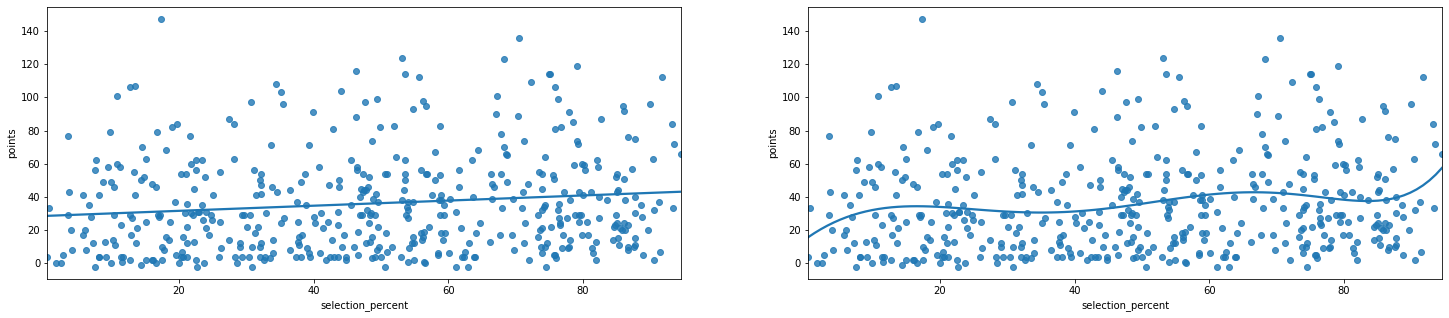

In [4]:
fig, axis = plt.subplots(1, 2, figsize=(25,5))
sns.regplot(data=df, x='selection_percent', y='points', ci=0, order=1, ax=axis[0])
sns.regplot(data=df, x='selection_percent', y='points', ci=0, order=6, ax=axis[1]);

#curve = np.polyfit(x=df['selection_percent'], y=df['points'], deg=7)
#print (curve)

Now lets visualise the data in different groups
* First we will plot selection_percent against points with additional grouping by teams
* Second combination will be same as the first one except this type the groupings will be based on the type

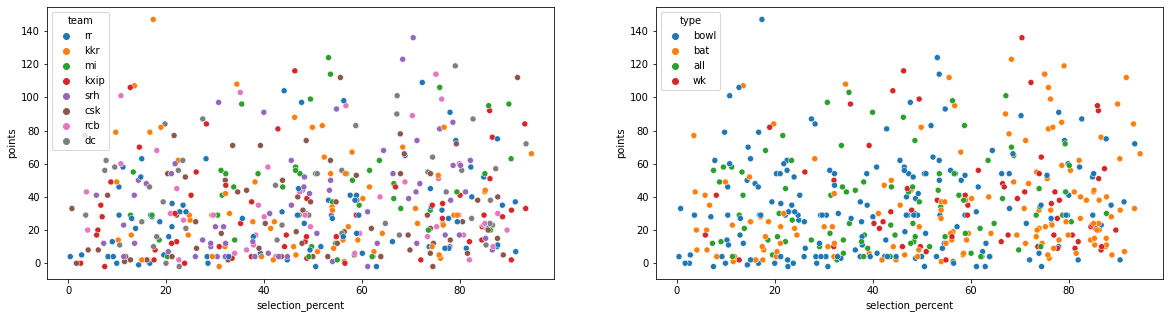

In [5]:
fig, axis = plt.subplots(ncols=2, figsize=(20,5))
sns.scatterplot(data=df, x='selection_percent', y='points', hue='team', ax=axis[0])
sns.scatterplot(data=df, x='selection_percent', y='points', hue='type', ax=axis[1]);

Now lets plot each team's point distribution

With this plot we can infer that,
  * If the regression line is having a *positive slope*, the team is *more predictable*. Points and selection percent is highly correlating or in other words popular players are playing well

  * If the regression line is *flat* then the team is *some what predictable*. Points and selection percent are not correlating or in other words both popular and unpopular players are playing an average game
  
  * If the regression line has a *negative slope* then the team is *less predictable*. Points and selection percent is inversly correlating or in other words unpopular players are shining and popular players are lagging behind


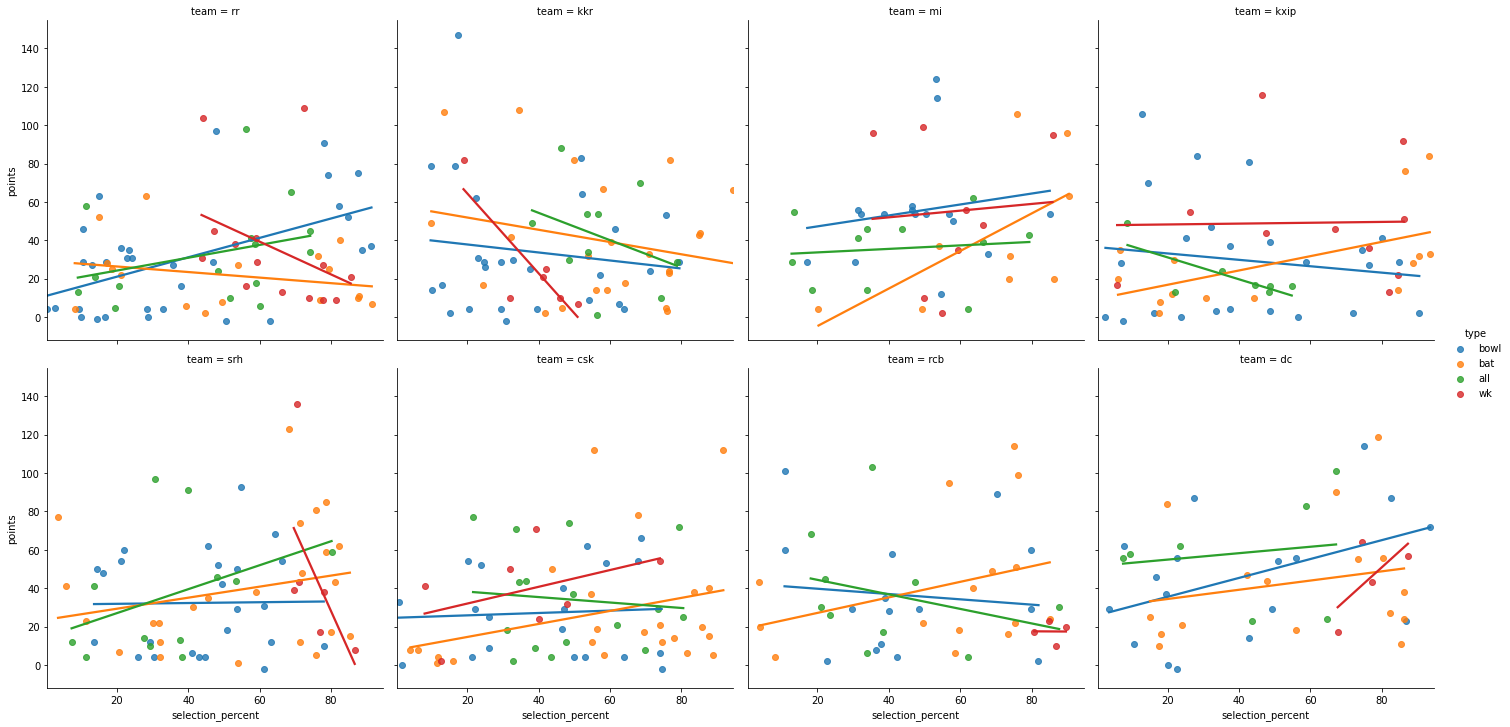

In [6]:
sns.lmplot(data=df, x="selection_percent", y="points", sharey=True, col="team", col_wrap=4, hue='type', ci=False);

Now we will plot the same kind of graph with same meaning but this time with more depth. By depth I mean how correlated are the points and selection percentage for *each role* of *each team*

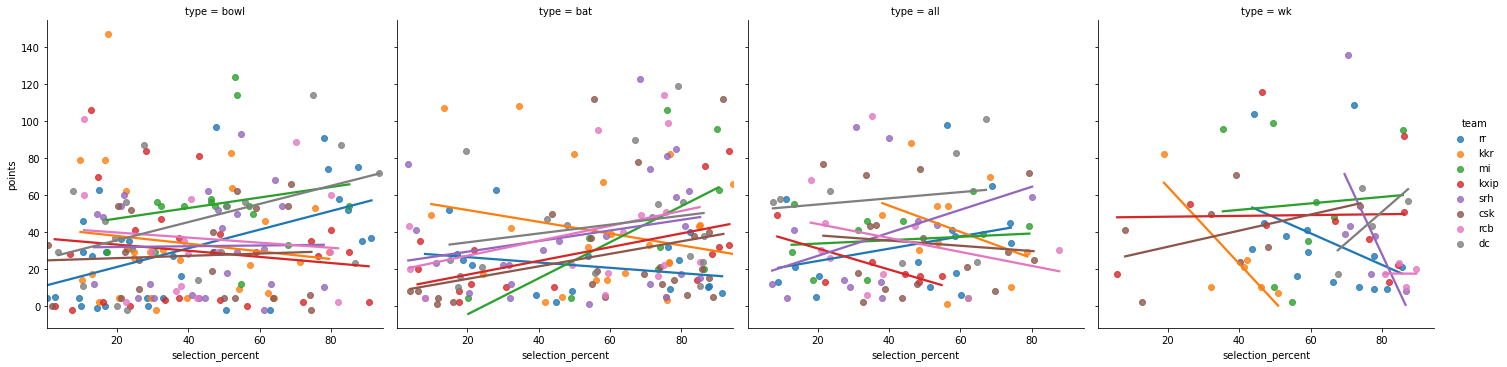

In [7]:
sns.lmplot(data=df, x="selection_percent", y="points", hue='team', col="type", col_wrap=4, ci=0);

During match day fill in the team name and then select individual roles for your dream team by inferring from the regression line


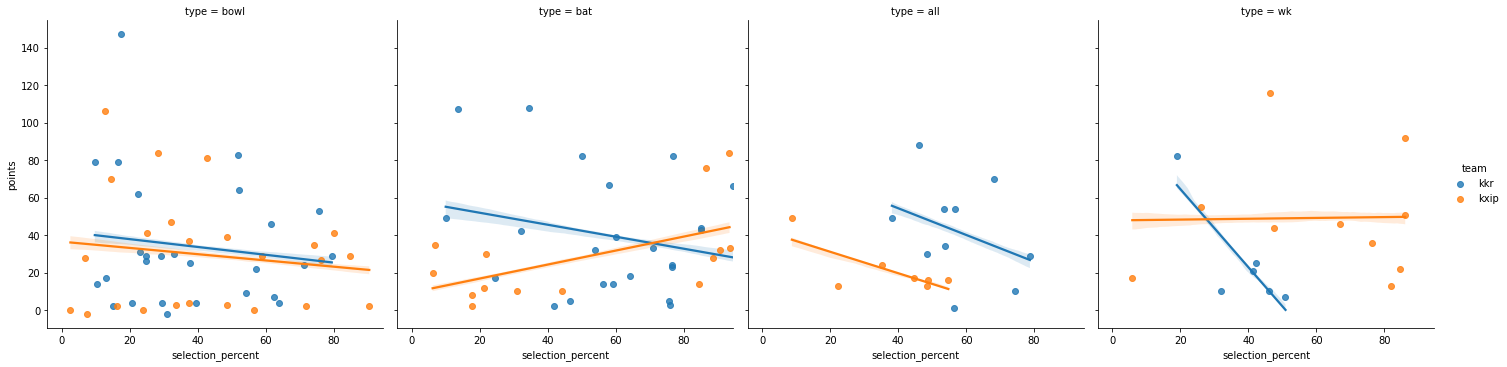

In [8]:
sns.lmplot(data=df, x="selection_percent", y="points", col="type", col_wrap=4, hue="team", hue_order=['kkr','kxip'], ci=20);

From 7th Oct I will start posting team performance by points they scored. Teams will be formed on the performance show in the above graphs and the latest match result will be updated after each match. Each match will have 4 teams formed on basis of below selection format

T1 - the crowd-said-so team

T2 - the I-said-so team

T3 - the expert's-said-so team

T4 - the algorithm-said-so team

Our whole focus will be whether the algorithm's team fare better than the team selected by the wisdom of crowd, the experts and my intuition

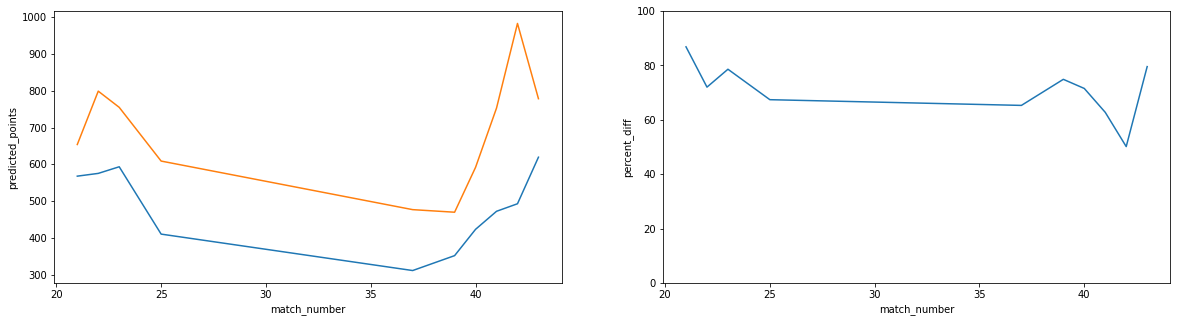

In [9]:
result_df = pd.read_csv('https://raw.githubusercontent.com/sarathsajan/dream11-predictor/main/d11-result.csv')
result_df['percent_diff'] = 100 * (result_df['predicted_points'] / result_df['max_points'])
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,5))
plot = sns.lineplot(data=result_df, x='match_number', y='predicted_points', ax=axes[0])
plot = sns.lineplot(data=result_df, x='match_number', y='max_points', ax=axes[0])
plot = sns.lineplot(data=result_df, x='match_number', y='percent_diff', ax=axes[1])
plot.axes.set_ylim(0,100);

## Prediction Time

Enough talk, let's now build a crude prediction model that predicts the player's points given their match-day selection percentage, player type and the team they belong to

But first let's form the training and testing dataset to create the model

In [10]:
dataset = df.copy()
cat_cols = dataset.select_dtypes(include=['object']).astype('category').copy()
dataset['team'] = cat_cols['team']
dataset['type'] = cat_cols['type']

enc = OneHotEncoder()
enc = enc.fit(cat_cols)
cat_cols = pd.DataFrame(enc.transform(cat_cols).toarray(), columns=['type_all', 'type_bat', 'type_bowl', 'type_wk', 'team_csk', 'team_dc', 'team_kkr', 'team_kxip', 'team_mi', 'team_rcb', 'team_rr', 'team_srh'])
for i in ['type_all', 'type_bat', 'type_bowl', 'type_wk', 'team_csk', 'team_dc', 'team_kkr', 'team_kxip', 'team_mi', 'team_rcb', 'team_rr', 'team_srh']:
  dataset[i] = cat_cols[i]
dataset = dataset.drop(columns=['team', 'type'])
print (dataset)

     selection_percent  points  type_all  ...  team_rcb  team_rr  team_srh
0                47.67      97       0.0  ...       0.0      1.0       0.0
1                 9.74      79       0.0  ...       0.0      0.0       0.0
2                79.17      74       0.0  ...       0.0      1.0       0.0
3                94.60      66       0.0  ...       0.0      0.0       0.0
4                52.30      64       0.0  ...       0.0      0.0       0.0
..                 ...     ...       ...  ...       ...      ...       ...
457               7.28      12       1.0  ...       0.0      0.0       1.0
458              29.12      12       0.0  ...       0.0      0.0       1.0
459              20.45       7       0.0  ...       0.0      0.0       1.0
460              40.88       6       0.0  ...       0.0      0.0       1.0
461              17.55       2       0.0  ...       0.0      0.0       0.0

[462 rows x 14 columns]


In [11]:
X = dataset.drop(columns=['points'])
y = dataset.drop(columns=['selection_percent', 'team_csk', 'team_srh', 'team_kkr', 'team_rcb', 'team_mi', 'team_rr', 'team_dc', 'team_kxip', 'type_wk', 'type_bat', 'type_all', 'type_bowl'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
#print (X_train.loc[0,:])

#Linear Regression
clf_lr = linear_model.LinearRegression()
clf_lr = clf_lr.fit(X_train, y_train)
print ('\nLinear Regression')
print ("Training: ", metrics.r2_score(y_train, clf_lr.predict(X_train)))
print ("Testing: ", metrics.r2_score(y_test, clf_lr.predict(X_test)))

#Random Forest Regression
clf_rfr = ensemble.RandomForestRegressor()
clf_rfr = clf_rfr.fit(X_train, y_train)
print ('\nRandom Forest Regression')
print ("Training: ", metrics.r2_score(y_train, clf_rfr.predict(X_train)))
print ("Testing: ", metrics.r2_score(y_test, clf_rfr.predict(X_test)))


Linear Regression
Training:  0.06265349689448219
Testing:  0.013977256899201596

Random Forest Regression
Training:  0.8254337436365164
Testing:  -0.14498288938249893


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


On Match day fill the below data and find the predicted points for an individual player. Enter the player's selection percentage, team, role in their respective places for prediction

In [12]:
X_predict = []
selection_percentage = 12
type_team = [['bowl', 'csk']]

type_team = enc.transform(type_team).toarray().tolist()
X_predict.append(selection_percentage)
for i in range (len(type_team[0])):
  X_predict.append(type_team[0][i])

#print ('\nPredicted Points by LR: ', clf_lr.predict([X_predict])[0][0])
print ('\nPredicted Points by RFR: ', clf_rfr.predict([X_predict])[0])


Predicted Points by RFR:  24.71


On Match day fill the below data to get a full dream team prediction

In [13]:
#add here the 22 player lineup when it is released just before the match
lineup = [
          {'name':'rana', 'team':'csk', 'type':'wk', 'selection_percentage':76.8},
          {'name':'w', 'team':'kkr', 'type':'bat', 'selection_percentage':48.96},
          {'name':'e', 'team':'rr', 'type':'bowl', 'selection_percentage':98.68},
          {'name':'r', 'team':'kkr', 'type':'bat', 'selection_percentage':48.89},
          {'name':'t', 'team':'kkr', 'type':'bat', 'selection_percentage':82.6},
          {'name':'y', 'team':'kkr', 'type':'bat', 'selection_percentage':6.4},
          {'name':'u', 'team':'kkr', 'type':'all', 'selection_percentage':91.68},
          {'name':'i', 'team':'kkr', 'type':'all', 'selection_percentage':34.8},
          {'name':'o', 'team':'kkr', 'type':'bowl', 'selection_percentage':64.36},
          {'name':'p', 'team':'kkr', 'type':'bowl', 'selection_percentage':98.65},
          {'name':'fg', 'team':'kkr', 'type':'bowl', 'selection_percentage':68.64},
          {'name':'d', 'team':'kkr', 'type':'wk', 'selection_percentage':48.54},
          {'name':'h', 'team':'csk', 'type':'bat', 'selection_percentage':68.4},
          {'name':'g', 'team':'csk', 'type':'bat', 'selection_percentage':89.8},
          {'name':'f', 'team':'csk', 'type':'all', 'selection_percentage':64.43},
          {'name':'wqe', 'team':'csk', 'type':'all', 'selection_percentage':44.64},
          {'name':'qw', 'team':'csk', 'type':'all', 'selection_percentage':65.6},
          {'name':'sdf', 'team':'csk', 'type':'bowl', 'selection_percentage':45.0},
          {'name':'fds', 'team':'csk', 'type':'bowl', 'selection_percentage':2.45},
          {'name':'gdf', 'team':'csk', 'type':'bowl', 'selection_percentage':5.5},
          {'name':'dfg', 'team':'csk', 'type':'bowl', 'selection_percentage':43.0},
          {'name':'sdf', 'team':'csk', 'type':'bowl', 'selection_percentage':12.0}
]

for player in lineup:
  #form_player_data
  player_data = []
  selection_percentage = player['selection_percentage']
  type_team = [[player['type'], player['team']]]
  type_team = enc.transform(type_team).toarray().tolist()
  player_data.append(selection_percentage)
  for i in range (len(type_team[0])):
    player_data.append(type_team[0][i])
  
  #predict player points
  #player_points = clf_lr.predict([player_data])[0][0]
  player_points = clf_rfr.predict([player_data])[0]
  player['points'] = player_points


rank_list = sorted(lineup, key=itemgetter('points'), reverse=True)

print ('name', '\t', 'team', '\t', 'type', '\t', 'points')
for player in rank_list:
  print (player['name'], '\t', player['team'], '\t', player['type'], '\t', player['points'])

name 	 team 	 type 	 points
fg 	 kkr 	 bowl 	 55.15
h 	 csk 	 bat 	 53.52
e 	 rr 	 bowl 	 52.04
i 	 kkr 	 all 	 50.41
y 	 kkr 	 bat 	 46.21
p 	 kkr 	 bowl 	 45.27
t 	 kkr 	 bat 	 40.56
w 	 kkr 	 bat 	 39.15
r 	 kkr 	 bat 	 39.15
d 	 kkr 	 wk 	 37.14
dfg 	 csk 	 bowl 	 35.06
u 	 kkr 	 all 	 34.36
wqe 	 csk 	 all 	 29.47
sdf 	 csk 	 bowl 	 24.71
sdf 	 csk 	 bowl 	 22.33
qw 	 csk 	 all 	 22.06
rana 	 csk 	 wk 	 21.98
f 	 csk 	 all 	 17.69
gdf 	 csk 	 bowl 	 16.22
g 	 csk 	 bat 	 14.02
o 	 kkr 	 bowl 	 11.23
fds 	 csk 	 bowl 	 8.39


## TO BE CONTINUED...